# Kerasでボストンの家賃を推測する回帰モデルを作る

1. データの準備
2. モデルの構築
3. 学習
4. 評価

今回は、連続の実数値を予測するモデルということで回帰モデルとなります。

簡単に回帰モデルについて説明すると、データをうまく表現してくれる線を見つけることです。


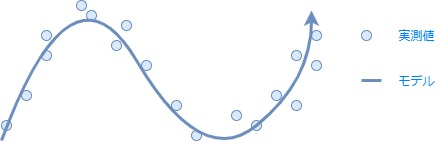

# データの準備

kerasのdatasetsには事前にボストン近郊の家賃を目的変数とする13個の変数を持つデータセットが用意されています。今回は、これを使って分類問題を解くモデルを構築し、深層学習の基本を見ていきましょう。

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [8]:
# データセットの準備
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2)

57344/57026 [==============================] - 0s 0us/step


データセットの中身を見てみましょう

|  変数  |  説明  |
| :----: | ---- |
|  CRIM  |  人口 1 人当たりの犯罪発生数  |
|  ZN  |  25,000 平方フィート以上の住居区画の占める割合  |
|  INDUS  | 小売業以外の商業が占める面積の割合 |
|  CHAS  |  チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)  |
|  NOX  |  NOx の濃度  |
|  RM  |  住居の平均部屋数  |
|  AGE  |  1940 年より前に建てられた物件の割合  |
| DIS	|5 つのボストン市の雇用施設からの距離 (重み付け済)|
| RAD	| 環状高速道路へのアクセスしやすさ|
|TAX|	$10,000 ドルあたりの不動産税率の総計|
|PTRATIO|	町毎の児童と教師の比率|
|B|	町毎の黒人 (Bk) の比率を次の式で表したもの。|
|LSTAT|	給与の低い職業に従事する人口の割合 (%)|

今回は、訓練データして404個、テスト用データとして102個のというようにデータを8:2の割合で分割しました。

また、深層学習では大量のデータを利用することが多いので、32bit形式にすることでメモリの使用率を抑えることができます。

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(404, 13) (404,) (102, 13) (102,)


In [12]:
x_train = np.array(x_train, np.float32)
y_train = np.array(y_train, np.float32)
x_test = np.array(x_test, np.float32)
y_test = np.array(y_test, np.float32)

深層学習を勉強するうえで、結果が全く同じになるようにするためにランダムシードを固定しておきます。マイクラのシードと同じですね。

In [15]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
#シードの固定
reset_seed()

#  モデルの構築

kerasには、簡単にモデルを構築できるSequential API,複雑なモデルを構築できるFunctional API, Subclassing APIがあります。

今回は、層を直列につないで構築するSequential APIを利用します。

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルの定義
model = Sequential([
    Dense(64, activation='relu', input_shape=(13, )),
    Dense(1),
])

# モデルのコンパイル
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae'])

詳細は省きますが、簡単にモデルの説明します。

第一層で13次元のから64次元に変えて、その後家賃の値段を出すために1次元にしています。

最適化手法としてadam、損失関数としてMSE、評価関数としてMAEとしています。

$$MSE = \frac{1}{N}\sum_{n=1}^{N}(t_n-y_n)^2$$
$$MAE = \frac{1}{N}\sum_{n=1}^{N}|t_n-y_n|^2$$

$y$：予測値、$t$：実際の値

In [17]:
# モデル構造の確認
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


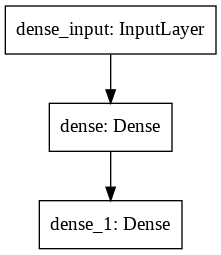

In [18]:
# モデル構造の可視化
tf.keras.utils.plot_model(model)

In [20]:
# モデルの学習
history = model.fit(x_train, y_train, 
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/30
13/13 [==============================] - 0s 11ms/step - loss: 3237.5100 - mae: 48.8926 - val_loss: 662.2463 - val_mae: 20.9535
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 789.1500 - mae: 21.7804 - val_loss: 605.0310 - val_mae: 20.3200
Epoch 3/30
13/13 [==============================] - 0s 2ms/step - loss: 354.9813 - mae: 14.4209 - val_loss: 193.6239 - val_mae: 9.8974
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: 200.9194 - mae: 9.1846 - val_loss: 106.7682 - val_mae: 8.2395
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 144.6363 - mae: 9.5849 - val_loss: 91.6657 - val_mae: 7.8329
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 116.4246 - mae: 8.0673 - val_loss: 78.4924 - val_mae: 6.7829
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 99.1373 - mae: 7.4275 - val_loss: 72.2787 - val_mae: 6.7247
Epoch 8/30
13/13 [==============================] - 0s 2ms/

In [21]:
# 学習済みモデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:\t", score[0])
print("Test MAE:\t", score[1])

Test loss:	 49.8268928527832
Test MAE:	 4.879434108734131


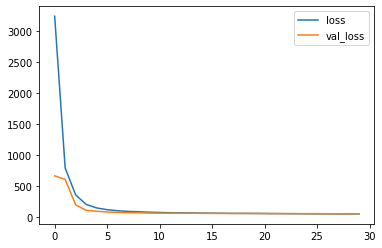

In [22]:
# 結果の可視化
result = pd.DataFrame(history.history)

# 目的関数の可視化
result[['loss', 'val_loss']].plot();

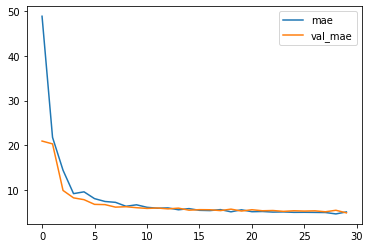

In [23]:
# 評価指標の可視化
result[['mae', 'val_mae']].plot();